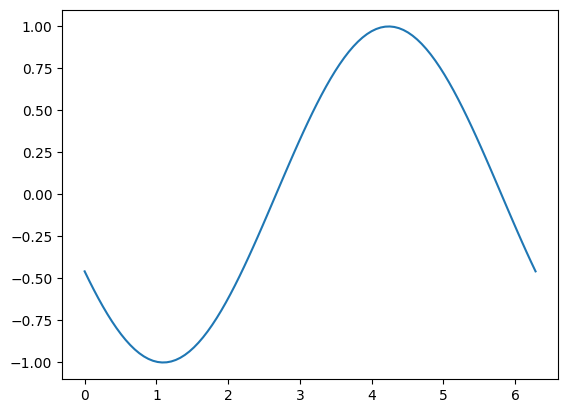

In [7]:
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

fig, ax = plt.subplots()
line, = ax.plot(x, y)

def animate(i):
    line.set_ydata(np.sin(x + i / 10.0))
    return line,

ani = FuncAnimation(fig, animate, frames=100, interval=50, blit=True)

# 在Jupyter环境中嵌入动画
from IPython.display import HTML
HTML(ani.to_jshtml())  # 或者使用 ani.to_html5_video() 来嵌入视频
